In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('movies.csv', encoding='latin1')

In [3]:
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [4]:
data_missing = round(100*(df.isnull().sum())/len(df),2)

In [5]:
data_missing

id                            0.00
budget                        0.00
genres                        0.53
homePage                     58.07
productionCompany             4.57
productionCompanyCountry     12.80
productionCountry             2.33
revenue                       0.00
runtime                       0.00
video                         4.86
director                      0.74
actors                        0.80
actorsPopularity              0.87
actorsCharacter               0.47
originalTitle                 0.00
title                         0.00
originalLanguage              0.00
popularity                    0.00
releaseDate                   0.00
voteAvg                       0.00
voteCount                     0.00
genresAmount                  0.00
productionCoAmount            0.00
productionCountriesAmount     0.00
actorsAmount                  0.00
castWomenAmount               0.00
castMenAmount                 0.00
dtype: float64

In [6]:
clean_df = df.drop(['id','genres','castMenAmount','castWomenAmount','actorsAmount','genresAmount','voteCount','releaseDate','title','actorsCharacter','actorsPopularity','productionCompany','actors','director','productionCountry','homePage', 'productionCountriesAmount','originalLanguage', 'originalTitle', 'productionCompanyCountry', 'video', 'productionCoAmount', 'productionCompanyCountry'], axis=1)

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      10000 non-null  int64  
 1   revenue     10000 non-null  float64
 2   runtime     10000 non-null  int64  
 3   popularity  10000 non-null  float64
 4   voteAvg     10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [8]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

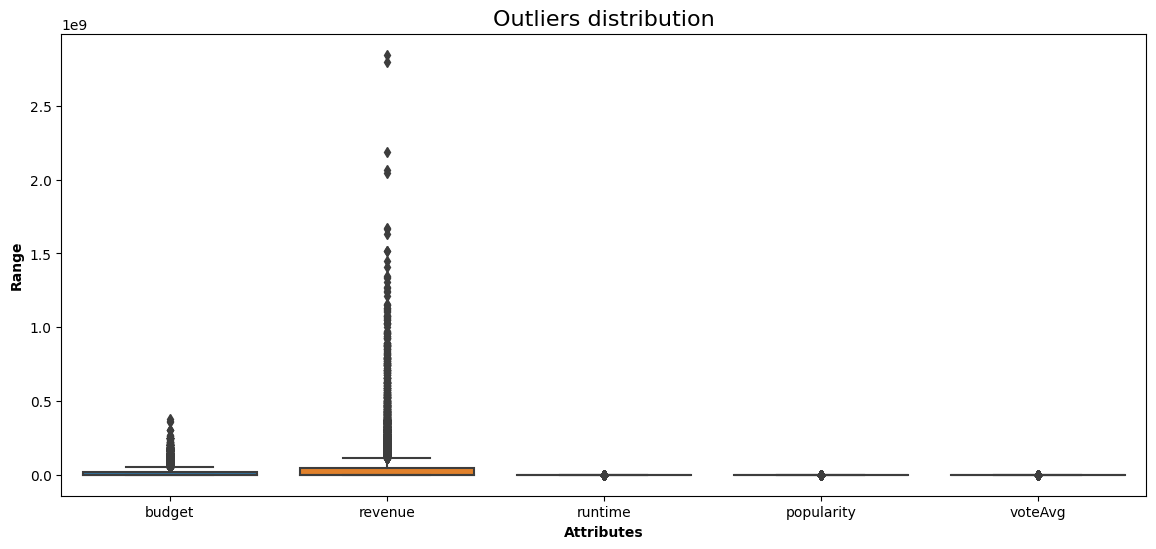

In [9]:
show_boxplot(clean_df)

In [10]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[str(col)] >= lower_bound) & 
        (df[str(col)] <= upper_bound)]
    return df

In [11]:
without_outliers = remove_outliers(clean_df)

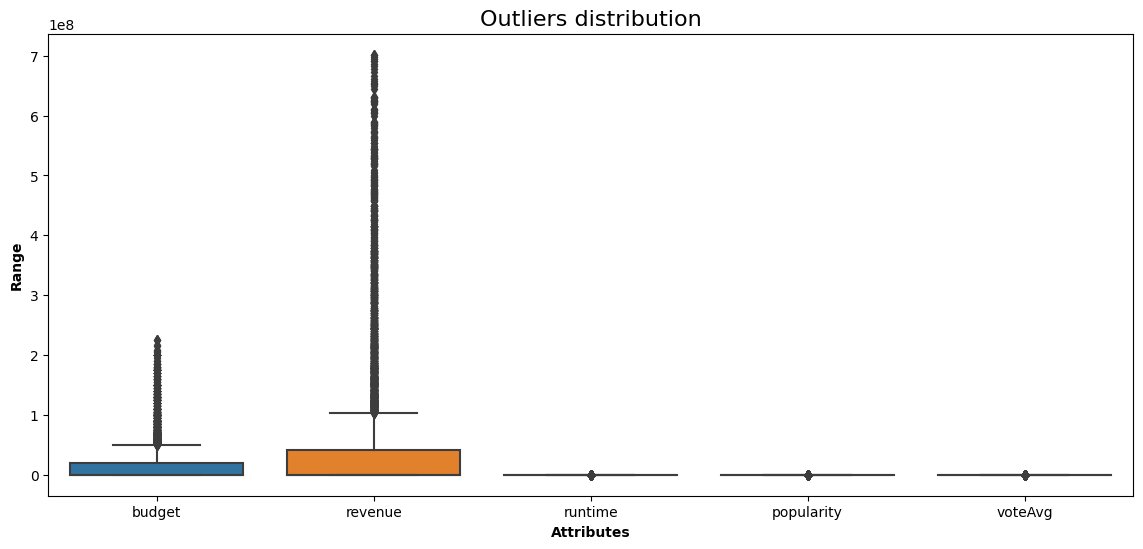

In [12]:
show_boxplot(without_outliers)

In [13]:
data_scaler = StandardScaler()

In [14]:
scaled_data = data_scaler.fit_transform(without_outliers)

In [15]:
scaled_data.shape

(9718, 5)

In [16]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

In [17]:
average_clustering = linkage(scaled_data, method="average", metric="euclidean")

In [18]:
#dendrogram(complete_clustering)

In [19]:
#plt.show()

In [20]:
#dendrogram(average_clustering)

In [21]:
#plt.show()

In [22]:
scaled_df = StandardScaler().fit_transform(scaled_data)

In [23]:
scaled_df

array([[-0.40125658, -0.41860756, -0.066092  , -0.36784106, -0.78115822],
       [ 0.15333942, -0.33561763,  0.39056075, -0.65222599,  0.03360981],
       [ 1.26253141,  6.67098498,  1.60830143,  0.58660255,  2.07052987],
       ...,
       [-0.53174976, -0.46344717,  0.01001679, -0.47414517,  0.33914782],
       [-0.53174976, -0.46344717, -1.55021346, -0.65051222, -0.47562021],
       [-0.52346161, -0.46077153, -3.79542284,  1.21656407, -1.79961825]])

In [24]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

In [25]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

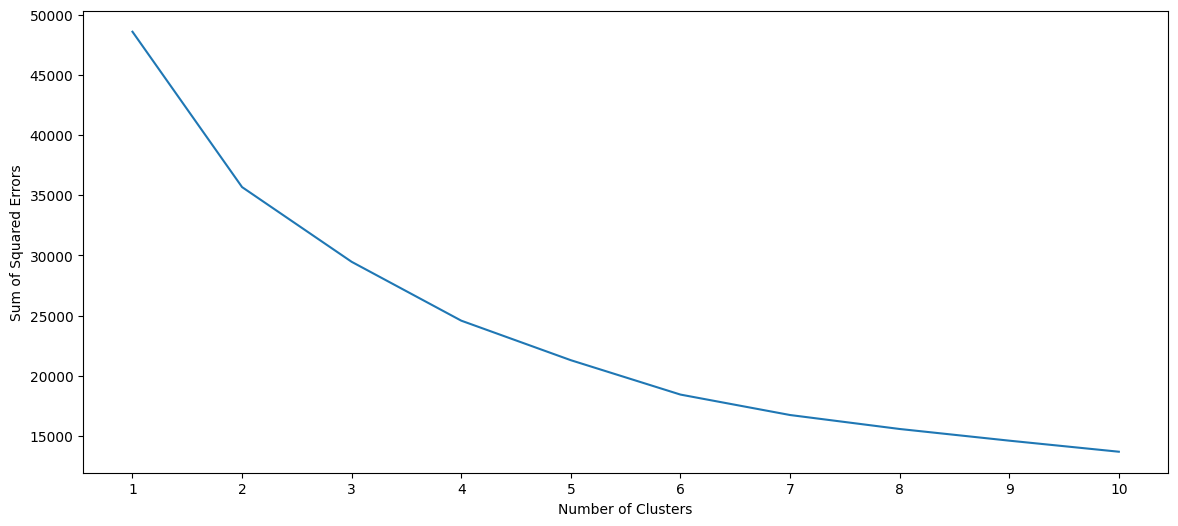

In [26]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [27]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

In [28]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=2, n_init=10, random_state=1)

In [29]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 1])

<AxesSubplot: xlabel='runtime', ylabel='revenue'>

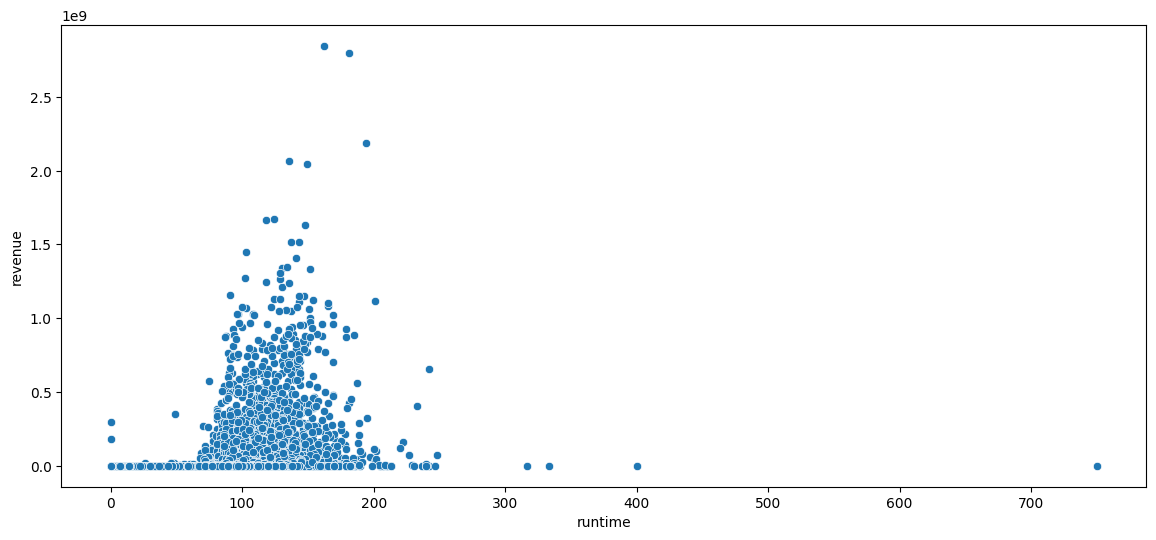

In [30]:
sns.scatterplot(data=clean_df, x="runtime", y="revenue")